In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

##### Acquire the data sets
###### from basketballreference.com

In [2]:
df= pd.read_excel('activeplayers.xls')

In [3]:
df=pd.DataFrame(df)

In [4]:
salary= pd.read_excel('salary.xls')

In [5]:
salary= pd.DataFrame(salary)

#### Prep
Must merge the tables (based on player name)
Exclude players not currently active or have nulls in necesary columns

In [24]:
pieces = {'player': df, 'player': salary}

df_sal = pd.concat(pieces)

df_sal.head()

Rk             Player   Tm   2019-20     2020-21     2021-22  \
player 0   1      Stephen Curry  GSW  40231758  43006362.0  45780966.0   
       1   2         Chris Paul  OKC  38506482  41358814.0  44211146.0   
       2   3  Russell Westbrook  HOU  38178000  41006000.0  43848000.0   
       3   4          John Wall  WAS  37800000  40824000.0  43848000.0   
       4   5       James Harden  HOU  37800000  40824000.0  43848000.0   

             2022-23  2023-24  2024-25 Signed Using   Guaranteed  
player 0         NaN      NaN      NaN  Bird Rights  129019086.0  
       1         NaN      NaN      NaN          NaN  124076442.0  
       2  46662000.0      NaN      NaN  Bird Rights  123032000.0  
       3  46872000.0      NaN      NaN  Bird Rights  122472000.0  
       4  46872000.0      NaN      NaN  Bird Rights  122472000.0

In [25]:

df_sal= df_sal.drop(df_sal[[ '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', 'Tm', 'Signed Using']], axis=1)

In [31]:
df_sal.rename(columns = {'2019-20':'Salary', 'Guranteed':'FullContract'}, inplace = True)

In [32]:
df_sal.head(1)

,,Rk,Player,salary,Guaranteed
player,0,1,Stephen Curry,40231758,129019086.0


In [35]:
dfmain= pd.merge(df_sal, df, on='Player')

dfmain.head(1)

,Rk_x,Player,salary,Guaranteed,Rk_y,From,To,Tm,Lg,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Stephen Curry,40231758,129019086.0,10,2010,2020,GSW,NBA,34.3,...,0.2,3.1,2.5,23.5,0.476,0.515,0.435,0.581,0.905,0.623


In [37]:
dfmain= dfmain.drop(dfmain[[ 'Rk_y', 'From', 'To', 'Lg']], axis=1)

##### ALL THE IRRELEVANT COLUMNS HAVE BEEN DELETED

##### INITIAL CLUSTER WITH KMEANS- PER TO SALARY

In [59]:

# Set up data

X = dfmain['PER'].values.reshape(-1,1)
y= dfmain['salary'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [60]:
kmc = KMeans(n_clusters=4, max_iter=1000, n_init=20)

In [68]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 4, 3, 4, 1, 3, 3, 1, 3, 3, 4, 1, 1,
       4, 4, 4, 3, 1, 4, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 4, 3, 1, 4, 3,
       3, 1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3,
       0, 3, 0, 0, 0, 4, 1, 3, 3, 4, 0, 4, 0, 3, 3, 0, 0, 3, 0, 3, 3, 4,
       3, 3, 3, 2, 2, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 4, 4, 0, 0, 3, 0, 2,
       0, 3, 2, 3, 3, 0, 0, 4, 3, 0, 3, 2, 4, 0, 0, 3, 3, 0, 3, 0, 0, 0,
       4, 0, 0, 4, 0, 4, 3, 0, 3, 0, 0, 4, 0, 0, 2, 0, 4, 0, 0, 2, 2, 0,
       0, 3, 3, 0, 0, 3, 3, 2, 3, 4, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1,
       3, 3, 2, 3, 0, 0, 0, 3, 0, 2, 2, 4, 0, 2, 3, 0, 3, 2, 2, 2, 2, 0,
       3, 0, 0, 0, 3, 2, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 2, 2, 0, 0, 1, 1,
       0, 0, 2, 4, 2, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 4, 2, 3, 1, 2, 4, 3,
       2, 0, 0, 4, 0, 2, 3, 2, 0, 3, 0, 0, 2, 0, 2, 3, 0, 0, 2, 0, 3, 0,
       2, 0, 2, 3, 1, 0, 2, 2, 3, 0, 0, 2, 3, 0, 0, 3, 0, 2, 0],
      dtype=int32)

In [61]:
# Fit
kmc.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

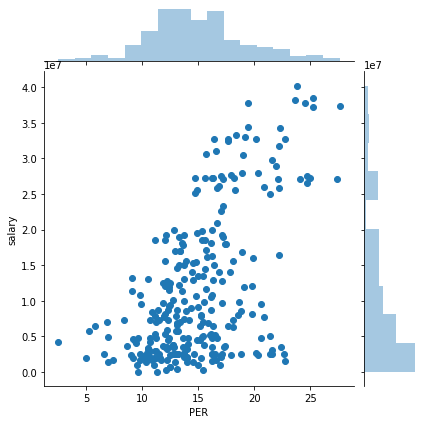

In [65]:
sns.jointplot(x="PER", y="salary", data=dfmain)